# Chapter 7: Frequentist Inference

## Parametric Infernce: Linear Regression

    Year  InterestRate  UnemploymentRate  StockPrice
0   2001          2.00               5.1       30000
1   2002          2.15               5.1       30010
2   2003          2.45               5.3       30500
3   2004          2.75               5.2       32104
4   2005          2.30               5.7       27098
5   2006          2.65               4.9       28459
6   2007          3.50               6.0       33512
7   2008          3.15               4.9       29565
8   2009          3.25               4.8       30931
9   2010          4.15               4.1       34958
10  2011          4.50               3.2       33211
11  2012          3.45               3.1       34293
12  2013          3.75               4.1       36384
13  2014          5.25               4.1       38866
14  2015          5.75               3.9       38776
15  2016          5.50               3.2       40822
16  2017          3.05               3.2       35704
17  2018          6.00               4.1      

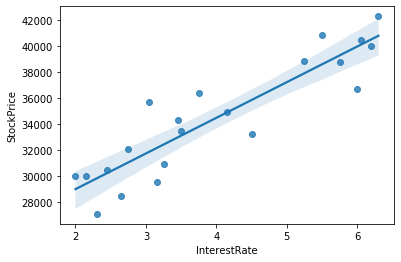

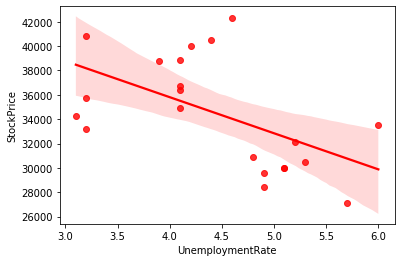

Predictions:
 0     28900.344332
1     29278.508818
2     29868.786739
3     30708.141239
4     29158.520145
5     30705.108162
6     31934.759459
7     31965.656451
8     32300.791636
9     35150.957245
10    36780.570789
11    34216.444907
12    34142.518613
13    37924.163482
14    39350.762825
15    39301.667368
16    33124.980749
17    39814.985916
18    40236.179705
19    39691.964165
20    40156.187256
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             StockPrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     46.28
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           8.04e-08
Time:                        12:29:53   Log-Likelihood:                -186.95
No. Observations:                  21   AIC:                             379.9
Df Residuals:      

In [1]:
from pandas import DataFrame  
import statsmodels.api as sm  
import seaborn  as sns  
import matplotlib.pyplot as plt  
  
StockMarketData = {  
    'Year': [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],  
    'InterestRate': [2, 2.15, 2.45, 2.75, 2.3, 2.65, 3.5, 3.15,3.25,4.15,4.5,3.45,3.75,5.25,5.75,5.5,3.05,6,6.2,6.05,6.3],  
    'UnemploymentRate': [5.1,5.1,5.3,5.2, 5.7, 4.9, 6, 4.9, 4.8, 4.1, 3.2 ,3.1, 4.1, 4.1, 3.9, 3.2, 3.2, 4.1,4.2,4.4,4.6],  
    'StockPrice': [30000,30010,30500,32104,27098,28459,33512,29565,30931,34958,33211,34293,36384,38866,38776,40822,35704,36719,40000,40500,42300]          
}  
  
df = DataFrame(StockMarketData,columns=['Year','InterestRate','UnemploymentRate','StockPrice'])   
print(df)  
  
# here we have 2 variables for the multiple linear regression.   
#If you just want to use one variable for simple linear regression,   
#then use X = df['Interest_Rate'] or X = df['UnemploymentRate']   
X = df[['InterestRate', 'UnemploymentRate'] ]  
Y = df['StockPrice']  
  
sns.regplot(x=X['InterestRate'],y=Y)  
plt.show()  
sns.regplot(x=X['UnemploymentRate'],y=Y,color='r')  
plt.show()  
  
X = sm.add_constant(X) # adding a constant for y-intercept  
  
model = sm.OLS(Y, X).fit()  
  
predictions = model.predict(X)   
print("Predictions:\n",predictions)  
print_model = model.summary()  
print(print_model) 


## Confidence Interval 

In [2]:
import numpy as np  
import scipy.stats as stats   
  
N=1000      # sample size  
gamma=0.95  # gamma = 1-alpha (also known as confidence level)  
alpha = 1 - gamma  
   
# mean and standard diviation of the population   
mu=5         
sigma=3      
  
# Normally distributed sample data of size N  
x=np.random.randn(N)*sigma+mu    
   
# Calculation of mean and standard deviation of the sample data  
mu_sample=np.mean(x)             
sigma_sample=np.std(x, ddof=1)   # delta degree of freedom ddof=1 means divide by N-1 instead of N for the sample STD.  
   
print('sample mean: mu_sample                                     : %f' % mu_sample)  
print('sample standard deviation: sigma_sample                    : %f' % sigma_sample)  

  
# calculations using nornmal distribuiton for 95% confidence level  
l1=stats.norm.ppf(0.025)    # lower percentile  
u1=stats.norm.ppf(0.975)  # upper percentile  
print('confidence interval of mu_sample using normal distribution : (%f, %f)' %   
      (mu_sample+l1*sigma_sample/np.sqrt(N), mu_sample+u1*sigma_sample/np.sqrt(N))) 


sample mean: mu_sample                                     : 4.933044
sample standard deviation: sigma_sample                    : 3.055712
confidence interval of mu_sample using normal distribution : (4.743652, 5.122435)


## Kernel Density Estimation 

In [3]:
%matplotlib inline  
import numpy as np  
from scipy import stats  
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
from statsmodels.distributions.mixture_rvs import mixture_rvs  
  
# Seed the random number generator for reproducible results  
np.random.seed(12345)  


In [4]:
# Location (center), scale (spread) and weight for the two distributions  
pdf1_loc, pdf1_scale, pdf1_weight = -1 , .5, .25  
pdf2_loc, pdf2_scale, pdf2_weight = 1 , .5, .75  
  
# Sample from a mixture of distributions  
sample_dist = mixture_rvs(prob=[pdf1_weight, pdf2_weight], size=250,  
dist=[stats.norm, stats.norm],  
kwargs = (dict(loc=pdf1_loc, scale=pdf1_scale), dict(loc=pdf2_loc, scale=pdf2_scale))) 


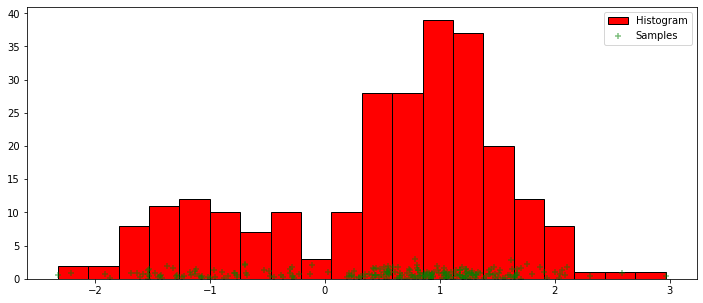

In [5]:
fig = plt.figure(figsize=(12, 5))  
ax = fig.add_subplot(111)  
  
# Scatter plot of data samples and histogram  
ax.scatter(sample_dist, np.abs(np.random.randn(sample_dist.size)),  
            zorder=2, color='g', marker='+', alpha=0.5, label='Samples')  
  
lines = ax.hist(sample_dist, bins=20, color = 'r', edgecolor='k', label='Histogram', zorder=1)  
  
ax.legend(loc='best')  
plt.show()


In [7]:
kde = sm.nonparametric.KDEUnivariate(sample_dist)  
kde.fit() # Estimate the densities  


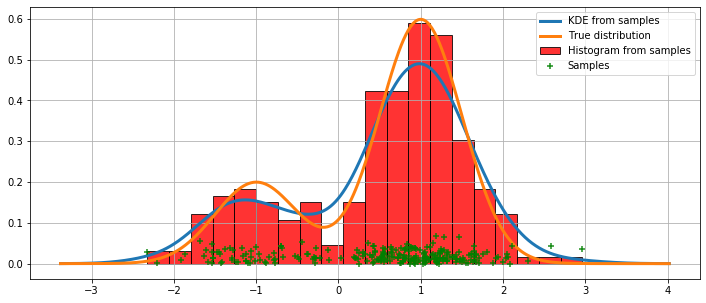

In [8]:
fig = plt.figure(figsize=(12, 5))  
ax = fig.add_subplot(111)  
  
# Plot the histogram of samples  
ax.hist(sample_dist, bins=20, density=True, label='Histogram from samples',  
        zorder=1, color = 'r', edgecolor='k', alpha=0.8)  
  
# Plot the KDE as fitted using the default arguments  
ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=2)  
  
  
# Plot the true distribution  
true_values = (stats.norm.pdf(loc=pdf1_loc, scale=pdf1_scale, x=kde.support)*pdf1_weight  
              + stats.norm.pdf(loc=pdf2_loc, scale=pdf2_scale, x=kde.support)*pdf2_weight)  
ax.plot(kde.support, true_values, lw=3, label='True distribution', zorder=3)  
  
# Plot the samples  
ax.scatter(sample_dist, np.abs(np.random.randn(sample_dist.size))/40,  
           marker='+', color='g', zorder=4, label='Samples', alpha=0.9)  
  
ax.legend(loc='best')  
ax.grid(True) 


## Hypothesis Testing

In [9]:
import numpy as np  
from numpy import random  
import math  
import scipy.stats as st  
  
  
population = np.array([20,12,22,32,52,1,22,30,40,50,6,12,32,52,1,22,3,7,12,32,52,62,12,32,52,11,22,3])  
sample_size = 12  
sample = random.choice(population, sample_size)  
  
population_mean = population.mean()  
print("Population Mean: ", population_mean)  
  
sample_mean = sample.mean()  
print("Sample Mean: ", sample_mean)  
  
# Null Hypothesis  
# sample_mean < 19  
# Alternate Hypothesis  
# sample_mean > 19  
  
pop_stdev = population.std()  
print("Population Standard Deviation: ", pop_stdev) 
z_test = (sample_mean - population_mean)/ (pop_stdev/math.sqrt(sample_size))  
print("Z test value: ",z_test)  
  
confidence_level = 0.95  
z_critical_val = st.norm.ppf(confidence_level)  
print("Z critical value: ", z_critical_val)  
  
if(z_test > z_critical_val):  
    print("Null Hypothesis is rejected.")  
else:  
    print("Null Hypothesis is accepted.")  


Population Mean:  25.214285714285715
Sample Mean:  21.75
Population Standard Deviation:  18.020538169498916
Z test value:  -0.6659422501858328
Z critical value:  1.6448536269514722
Null Hypothesis is accepted.


In [10]:
import numpy as np    
from numpy import random    
import math    
import scipy.stats as st    
    
population = np.array([20,12,22,32,52,1,22,30,40,50,6,12,32,52,1,22,3,7,12,32,52,62,12,32,52,11,22,3])    
sample_size = 12    
sample = random.choice(population,12)    
  
population_mean = population.mean()    
print("Population Mean: ", population_mean)    
    
sample_mean = sample.mean()    
print('Sample Mean:' , sample_mean)    
    
# Null Hypothesis    
# sample_mean = 23.5    
# Alternate Hypothesis    
# sample_mean != 23.5    
    
pop_stdev = population.std()     
print("Population Standard Deviation: ", pop_stdev)    
z_test = (sample_mean - population_mean)/ (pop_stdev/math.sqrt(sample_size))    
print('Z test value:', z_test)    
  
# calculation of p-value   
if (z_test>0):  
    p_val = 1 - st.norm.cdf(z_test)   
else:  
    p_val = st.norm.cdf(z_test)   
print('p-value:' ,p_val)    
  
# Right Tail    
confidence_level = 0.95    
alpha = 1-confidence_level  
z_critical_val1 = st.norm.ppf(confidence_level+alpha/2)    
    
# Left Tail    
z_critical_val2 = st.norm.ppf(alpha/2)    
  
print("Z critical value 1: ", z_critical_val1)    
print("Z critical value 2: ", z_critical_val2)    
    
#if(z_test > z_critical_val1 or z_test < z_critical_val2):     either use this line or the line following it  
if(p_val < alpha/2):  
    print("Null Hypothesis is rejected.")    
else:    
    print("Null Hypothesis is accepted.") 


Population Mean:  25.214285714285715
Sample Mean: 23.5
Population Standard Deviation:  18.020538169498916
Z test value: -0.32953843308164926
p-value: 0.37087437462839434
Z critical value 1:  1.959963984540054
Z critical value 2:  -1.959963984540054
Null Hypothesis is accepted.
